In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the CSV file
df = pd.read_csv('All_features_All_Grades_41.csv')
df.shape


(5778, 42)

In [3]:
# Split the data into features (X) and labels (y)
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [4]:
# Encode the labels
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [6]:
num_classes=5

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert target values to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=5)
y_test_encoded = to_categorical(y_test, num_classes=5)


In [8]:
# Reshape the input data to fit the CNN model
# Reshape the input features for CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [9]:
###### Define the CNN model architecture
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 2, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [10]:
from tensorflow.keras.utils import to_categorical

# Convert target values to one-hot encoded format
y_train_encoded = to_categorical(y_train, num_classes=5)
y_test_encoded = to_categorical(y_test, num_classes=5)

tf.keras.backend.clear_session()

In [11]:
#X_train.shape
X_test.shape
y_train_encoded.shape
y_test_encoded.shape

(1156, 5)

In [12]:
# Fit the model with the updated target values
model.fit(X_train, y_train_encoded, epochs=70, batch_size=32, validation_data=(X_test, y_test_encoded))

Epoch 1/70
145/145 [==============================] - 1s 7ms/step - loss: 1.3904 - accuracy: 0.4161 - val_loss: 1.3605 - val_accuracy: 0.4360
Epoch 2/70
145/145 [==============================] - 1s 6ms/step - loss: 1.3311 - accuracy: 0.4379 - val_loss: 1.3305 - val_accuracy: 0.4377
Epoch 3/70
145/145 [==============================] - 1s 6ms/step - loss: 1.3053 - accuracy: 0.4416 - val_loss: 1.3251 - val_accuracy: 0.4317
Epoch 4/70
145/145 [==============================] - 1s 6ms/step - loss: 1.2900 - accuracy: 0.4498 - val_loss: 1.3012 - val_accuracy: 0.4403
Epoch 5/70
145/145 [==============================] - 1s 6ms/step - loss: 1.2761 - accuracy: 0.4595 - val_loss: 1.3033 - val_accuracy: 0.4455
Epoch 6/70
145/145 [==============================] - 1s 6ms/step - loss: 1.2680 - accuracy: 0.4656 - val_loss: 1.3060 - val_accuracy: 0.4429
Epoch 7/70
145/145 [==============================] - 1s 6ms/step - loss: 1.2510 - accuracy: 0.4662 - val_loss: 1.3186 - val_accuracy: 0.4542
Epoch 

145/145 [==============================] - 1s 7ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 6.2229 - val_accuracy: 0.3460
Epoch 59/70
145/145 [==============================] - 1s 8ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 6.3164 - val_accuracy: 0.3452
Epoch 60/70
145/145 [==============================] - 1s 6ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 6.3988 - val_accuracy: 0.3434
Epoch 61/70
145/145 [==============================] - 1s 7ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 6.4854 - val_accuracy: 0.3495
Epoch 62/70
145/145 [==============================] - 1s 7ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 6.5557 - val_accuracy: 0.3460
Epoch 63/70
145/145 [==============================] - 1s 6ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 6.6279 - val_accuracy: 0.3478
Epoch 64/70
145/145 [==============================] - 1s 7ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 6.6847 - val_accuracy: 0.3452
Epoch 65/70

In [13]:
# Save the trained model
model.save('trained_model2.h5')

print(X_test.shape)
print(y_test.shape)

(1156, 41, 1)
(1156,)


In [14]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

37/37 [==============================] - 0s 2ms/step - loss: 7.0846 - accuracy: 0.3512
Test Loss: 7.084648132324219, Test Accuracy: 0.3512110710144043


In [15]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(y_pred, axis=1)

# Convert true labels to class labels
true_labels = np.argmax(y_test_encoded, axis=1)

# Compare predicted labels with true labels
for i in range(len(X_test)):
    print(f"Sample {i+1}: Predicted label={predicted_labels[i]}, True label={true_labels[i]}")

Sample 1: Predicted label=1, True label=0
Sample 2: Predicted label=0, True label=1
Sample 3: Predicted label=0, True label=3
Sample 4: Predicted label=2, True label=2
Sample 5: Predicted label=1, True label=0
Sample 6: Predicted label=0, True label=3
Sample 7: Predicted label=1, True label=2
Sample 8: Predicted label=0, True label=2
Sample 9: Predicted label=0, True label=0
Sample 10: Predicted label=1, True label=3
Sample 11: Predicted label=0, True label=2
Sample 12: Predicted label=0, True label=3
Sample 13: Predicted label=0, True label=0
Sample 14: Predicted label=0, True label=2
Sample 15: Predicted label=0, True label=1
Sample 16: Predicted label=1, True label=0
Sample 17: Predicted label=0, True label=2
Sample 18: Predicted label=2, True label=0
Sample 19: Predicted label=3, True label=0
Sample 20: Predicted label=2, True label=0
Sample 21: Predicted label=0, True label=1
Sample 22: Predicted label=0, True label=1
Sample 23: Predicted label=0, True label=0
Sample 24: Predicted

In [16]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print(cm)

[[236  79  97  50   2]
 [ 79  37  51  29   2]
 [120  45  93  32   7]
 [ 43  21  53  34   7]
 [  7   0  12  14   6]]


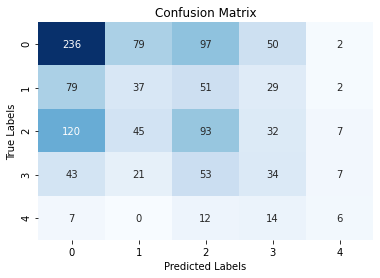

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a confusion matrix named 'confusion_matrix'
confusion_matrix = [[236, 79, 97, 50, 2],
                    [79, 37, 51, 29, 2],
                    [120, 45, 93, 32, 7],
                    [43, 21, 53, 34, 7],
                    [7, 0, 12, 14, 6]]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set axis labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

# Show the plot
plt.show()